In [197]:
import pandas as pd
import sklearn

In [198]:
df = pd.read_csv("/Users/Thinkport/Documents/ba/bachelorarbeit/data/Experiments.csv", sep=';')
df.reset_index(inplace=True, drop=True)

del df["UID"]
del df["average "]
del df["step"]
del df["total_energy"]
del df["status"]
del df["git repository"]
del df["Host OS"]
del df["Guest OS"]

In [199]:
df.columns

Index(['Virtualization technology', 'time', 'energy', 'workflow', 'vcpu',
       'memory', 'hint dedicated', 'vcpupin', 'emulatorpin', 'iothreadpin',
       'shares', 'cachetune', 'hotplug', 'enable nesting pages',
       'enable PAE/NX', 'execution cap', 'cpu limit'],
      dtype='object')

In [200]:
columns = [i.replace(" ", "_").lower() for i in df.columns]

In [201]:
columns

['virtualization_technology',
 'time',
 'energy',
 'workflow',
 'vcpu',
 'memory',
 'hint_dedicated',
 'vcpupin',
 'emulatorpin',
 'iothreadpin',
 'shares',
 'cachetune',
 'hotplug',
 'enable_nesting_pages',
 'enable_pae/nx',
 'execution_cap',
 'cpu_limit']

In [202]:
d = dict(zip(df.columns, columns))

In [203]:
def transform_time(timestr):
    ftr = [3600,60,1]
    return sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])

In [204]:
df.rename(columns=d, inplace=True)
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,00:35:45,"17,71191106",containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,00:34:12,"16,07706389",containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,00:06:06,"2,828216667",ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,00:06:09,"2,845361111",ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,00:37:28,"18,24825694",containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,00:39:26,"19,34864583",containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,00:36:55,"17,90830833",containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,00:06:33,"2,784347222",ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,00:06:05,"2,885748611",ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,00:40:38,"22,61157778",containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [205]:

df = df[df.energy.notna()]
df.energy = df.energy.apply(lambda x:float(x.replace(",", ".")))
df = df[~df.isnull().any(axis=1)]



df.time = df.time.apply(transform_time)

In [206]:
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,2145,17.711911,containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,2052,16.077064,containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,366,2.828217,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,369,2.845361,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,2248,18.248257,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,2366,19.348646,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,2215,17.908308,containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,393,2.784347,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,365,2.885749,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,2438,22.611578,containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 39
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   virtualization_technology  39 non-null     object 
 1   time                       39 non-null     int64  
 2   energy                     39 non-null     float64
 3   workflow                   39 non-null     object 
 4   vcpu                       39 non-null     int64  
 5   memory                     39 non-null     int64  
 6   hint_dedicated             39 non-null     int64  
 7   vcpupin                    39 non-null     int64  
 8   emulatorpin                39 non-null     int64  
 9   iothreadpin                39 non-null     int64  
 10  shares                     39 non-null     int64  
 11  cachetune                  39 non-null     int64  
 12  hotplug                    39 non-null     int64  
 13  enable_nesting_pages       39 non-null     float64
 14  e

In [208]:
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,2145,17.711911,containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,2052,16.077064,containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,366,2.828217,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,369,2.845361,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,2248,18.248257,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,2366,19.348646,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,2215,17.908308,containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,393,2.784347,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,365,2.885749,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,2438,22.611578,containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [209]:
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,2145,17.711911,containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,2052,16.077064,containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,366,2.828217,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,369,2.845361,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,2248,18.248257,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,2366,19.348646,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,2215,17.908308,containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,393,2.784347,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,365,2.885749,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,2438,22.611578,containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [210]:
values_string = []
values_numbers = []

for col in df.columns:
    print("columns:", col)
    all_values = list(df[col])
    print(all_values)
    if type(all_values[0]) == str:
        values_string.append(col)
    else:
        values_numbers.append(col)
    print(set(df[col]))
    print()

columns: virtualization_technology
['KVM', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM ', 'VirtualBox', 'VirtualBox', 'KVM', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'LXC', 'LXC', 'LXC', 'LXC', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'LXC', 'LXC', 'LXC']
{'KVM', 'VirtualBox', 'KVM ', 'LXC'}

columns: time
[2145, 2052, 366, 369, 2248, 2366, 2215, 393, 365, 2438, 1140, 1962, 2008, 2082, 2121, 2276, 2283, 2760, 365, 641, 1955, 1924, 2145, 3424, 1884, 1990, 352, 358, 1747, 1952, 1879, 1646, 1952, 2003, 2227, 960, 352, 350, 356]
{641, 2052, 1924, 2438, 393, 1952, 2082, 1955, 2215, 1962, 2227, 2366, 960, 1990, 2248, 2121, 2760, 1747, 2003, 1879, 2008, 1884, 350, 3424, 2145, 352, 2276, 356, 358, 2283, 365, 366, 1646, 369, 1140}

columns: energy
[17.71191106, 16.07706389, 2.828216667, 2.845361111, 18.24825694, 19.34864583, 17.90830833, 

In [211]:
# step - all values are similar
# execution_cap - only 2 values 


In [212]:
values_string

['virtualization_technology', 'workflow']

In [213]:
values_numbers = ['time',
 'vcpu',
 'memory',
 'hint_dedicated',
 'vcpupin',
 'emulatorpin',
 'iothreadpin',
 'shares',
 'cachetune',
 'hotplug',
 'enable_nesting_pages',
 'enable_pae',
 'execution_cap',
 'cpu_limit']

In [214]:
from sklearn.preprocessing import normalize, OneHotEncoder
import numpy as np


ohe = OneHotEncoder()
data = ohe.fit_transform(df[values_string])
df1 = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
df2 = pd.DataFrame(df[values_numbers].T, values_numbers).T
df_all = pd.concat([df1, df2], axis=1)

KeyError: "['enable_pae'] not in index"

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Y = df["energy"]

In [215]:
df_all.columns

Index(['virtualization_technology_KVM', 'virtualization_technology_LXC',
       'virtualization_technology_VirtualBox', 'workflow_ci',
       'workflow_containers', 'workflow_vue-ci', 'time', 'vcpu', 'memory',
       'hint_dedicated', 'vcpupin', 'emulatorpin', 'iothreadpin', 'shares',
       'cachetune', 'hotplug', 'enable_nesting_pages', 'enable_pae',
       'execution_cap', 'cpu_limit'],
      dtype='object')

In [216]:
df_all.columns

Index(['virtualization_technology_KVM', 'virtualization_technology_LXC',
       'virtualization_technology_VirtualBox', 'workflow_ci',
       'workflow_containers', 'workflow_vue-ci', 'time', 'vcpu', 'memory',
       'hint_dedicated', 'vcpupin', 'emulatorpin', 'iothreadpin', 'shares',
       'cachetune', 'hotplug', 'enable_nesting_pages', 'enable_pae',
       'execution_cap', 'cpu_limit'],
      dtype='object')

In [217]:
# Save the DataFrame to a CSV file
df_all.to_csv('df_all.csv', index=False)

# Download the CSV file
from IPython.display import FileLink

# Display a link to download the CSV file
FileLink('df_all.csv')

/Users/Thinkport/Documents/ba/bachelorarbeit/jupyter notebooks/df_all.csv

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
df_all

,virtualization_technology_KVM,virtualization_technology_LXC,virtualization_technology_VirtualBox,workflow_ci,workflow_containers,workflow_vue-ci,time,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae,execution_cap,cpu_limit
0,1,0,0,0,1,0,2145.0,1.0,4000.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
1,0,0,1,0,1,0,2052.0,1.0,4000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,100.0,-1.0
2,1,0,0,1,0,0,366.0,1.0,4096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
3,1,0,0,1,0,0,369.0,1.0,4096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
4,1,0,0,0,1,0,2248.0,1.0,4096.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
5,1,0,0,0,1,0,2366.0,1.0,4096.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
6,1,0,0,0,1,0,2215.0,1.0,4096.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,0,0,1,1,0,0,393.0,1.0,4241.0,0.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,100.0,-1.0
8,0,0,1,1,0,0,365.0,1.0,4241.0,0.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,100.0,-1.0
9,1,0,0,0,1,0,2438.0,1.0,5000.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0


In [220]:
reg = LinearRegression().fit(df_all, Y)

In [221]:
# pd.DataFrame([list(df_all.columns), reg.coef_], columns=["name","value"])
res = pd.DataFrame({"name": list(df_all.columns), "value": list(reg.coef_)}).sort_values("value")

In [222]:
# df1
res["var_type"] = res.name.apply(lambda x:x in set(ohe.get_feature_names_out()))

In [223]:
res

,name,value,var_type
16,enable_nesting_pages,-12.196276,False
5,workflow_vue-ci,-9.337360,False
9,hint_dedicated,-8.846895,False
1,virtualization_technology_LXC,-7.434021,True
19,cpu_limit,-7.434021,False
3,workflow_ci,-6.701153,True
11,emulatorpin,-0.064287,False
6,time,-0.005431,False
8,memory,-0.003787,False
13,shares,-0.002507,False


In [224]:
# Display a link to download the CSV file
FileLink('df_all.csv')
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_all, Y)
coefs = reg.coef_
feature_names = df_all.columns

In [225]:
len(list(reg.coef_)), len(list(df_all.columns))
# pd.DataFrame([list(df_all.columns), reg.coef_], columns=["name","value"])
res = pd.DataFrame({"name": list(df_all.columns), "value": list(reg.coef_)})
# df1
res["var_type"] = res.name.apply(lambda x:x in set(ohe.get_feature_names_out()))
res

,name,value,var_type
0,virtualization_technology_KVM,7.433758,True
1,virtualization_technology_LXC,-7.434021,True
2,virtualization_technology_VirtualBox,0.000263,True
3,workflow_ci,-6.701153,True
4,workflow_containers,16.038513,True
5,workflow_vue-ci,-9.337360,False
6,time,-0.005431,False
7,vcpu,10.212210,False
8,memory,-0.003787,False
9,hint_dedicated,-8.846895,False


In [226]:
df_all.columns

Index(['virtualization_technology_KVM', 'virtualization_technology_LXC',
       'virtualization_technology_VirtualBox', 'workflow_ci',
       'workflow_containers', 'workflow_vue-ci', 'time', 'vcpu', 'memory',
       'hint_dedicated', 'vcpupin', 'emulatorpin', 'iothreadpin', 'shares',
       'cachetune', 'hotplug', 'enable_nesting_pages', 'enable_pae',
       'execution_cap', 'cpu_limit'],
      dtype='object')

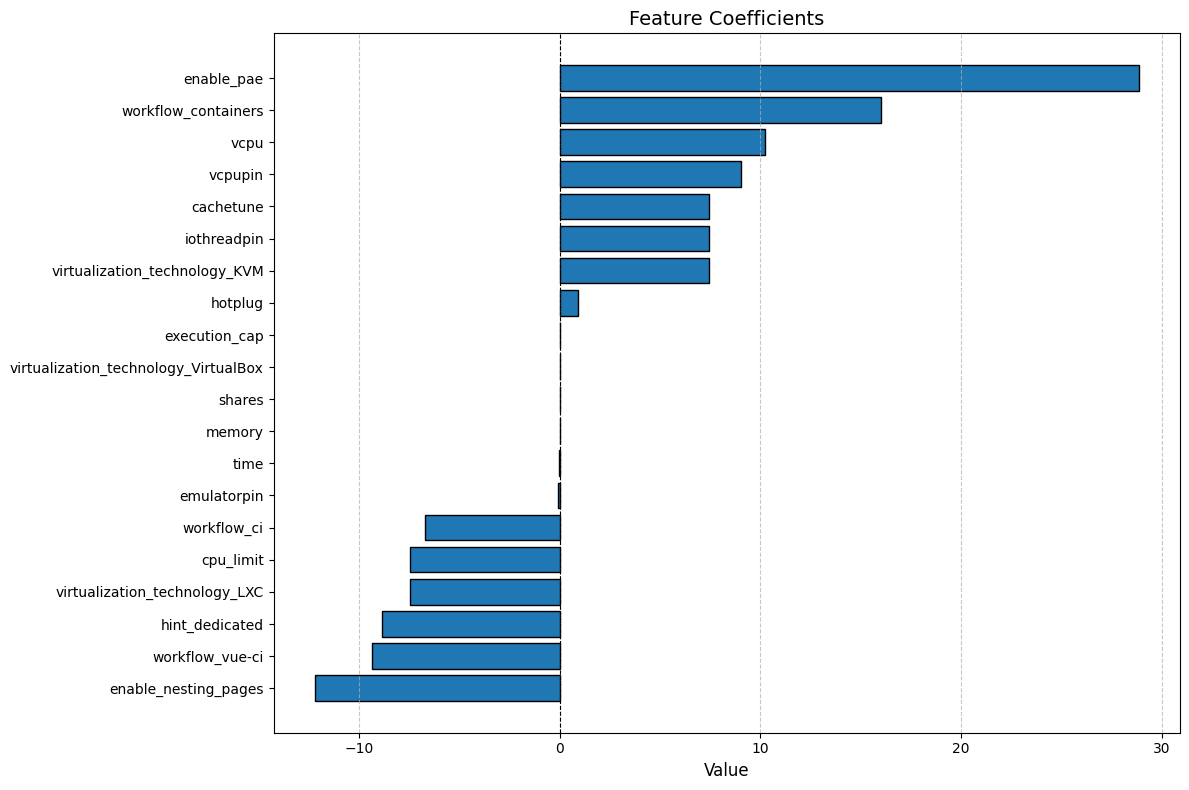

In [227]:
import matplotlib.pyplot as plt
import pandas as pd



df = pd.DataFrame(res)
# Sort values for better visualization
df_sorted = df.sort_values(by="value")


# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted["name"], df_sorted["value"], edgecolor="black")

# Add labels and title
plt.xlabel("Value", fontsize=12)
plt.title("Feature Coefficients", fontsize=14)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Add a vertical line at zero
plt.grid(axis="x", linestyle="--", alpha=0.7)


# Adjust layout and show plot
plt.tight_layout()
# Save the figure to a file
plt.savefig('/Users/Thinkport/Documents/ba/bachelorarbeit/results/res1.png', dpi=600, bbox_inches='tight') 

In [228]:
from scipy.optimize import minimize
import numpy as np

# Define the energy function (replace with your actual function)
def energy_function(params):
    # Example: a quadratic energy function
    # Assume params = [x1, x2, ..., xn]
    return np.sum(np.square(params))  # Replace with your energy formula

# Initial guess for parameters (same number as input features)
initial_params = np.random.randn(len(df_sorted))  # Replace with realistic initial values

# Perform minimization
result = minimize(energy_function, initial_params, method='BFGS')

# Extract the optimal parameters
optimal_params = result.x
minimum_energy = result.fun
df_minimal = pd.DataFrame(optimal_params,feature_names)
# Display results
print("Optimal Parameters:", optimal_params)
print("Minimum Energy:", minimum_energy)

Optimal Parameters: [ 6.76169132e-07  7.15482934e-07  1.40608718e-06  8.39795458e-07
  6.72250218e-08  3.21297318e-08 -5.79779725e-07  9.76243497e-09
  1.75357004e-06  1.75333119e-06  1.33538159e-06  2.00512358e-06
  9.73381276e-07  5.61827503e-07 -1.71126186e-08  1.01113027e-07
  4.65694538e-07 -3.41692692e-07  8.31559132e-07 -2.45464479e-07]
Minimum Energy: 1.8305198786874647e-11


In [229]:
df_minimal

,0
virtualization_technology_KVM,6.761691e-07
virtualization_technology_LXC,7.154829e-07
virtualization_technology_VirtualBox,1.406087e-06
workflow_ci,8.397955e-07
workflow_containers,6.722502e-08
workflow_vue-ci,3.212973e-08
time,-5.797797e-07
vcpu,9.762435e-09
memory,1.753570e-06
hint_dedicated,1.753331e-06


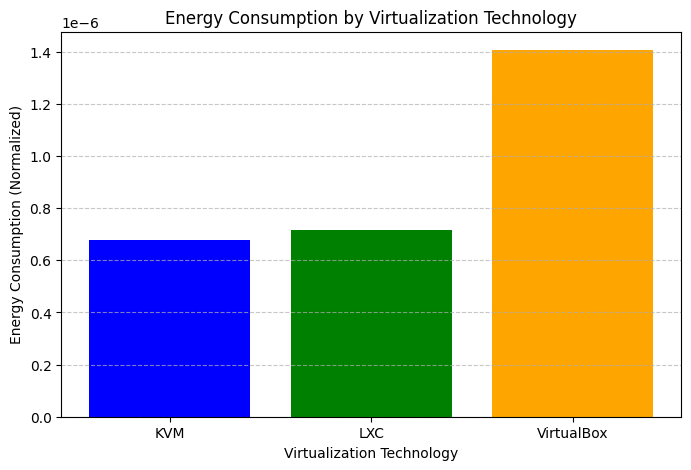

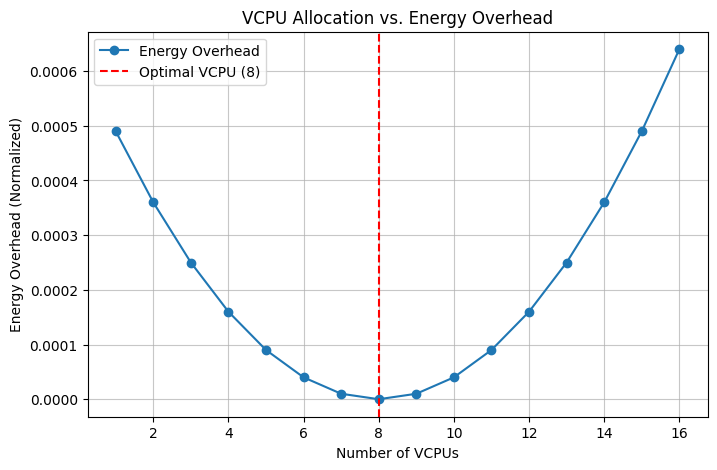

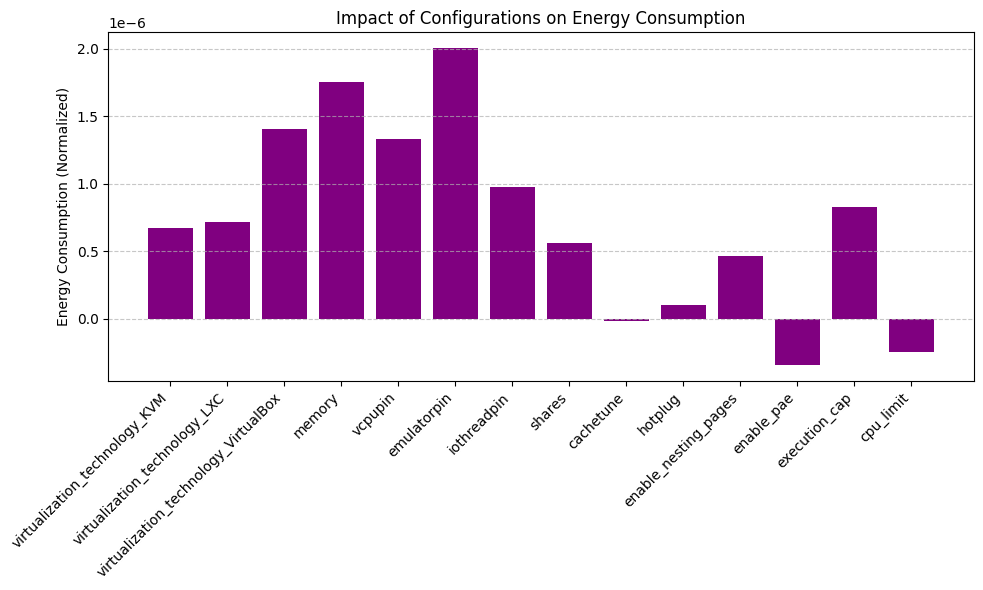

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Minimal energy consumption values (normalized)
data = {
    "virtualization_technology_KVM": 6.761691e-07,
    "virtualization_technology_LXC": 7.154829e-07,
    "virtualization_technology_VirtualBox": 1.406087e-06,
    "vcpu": 9.762435e-09,
    "memory": 1.753570e-06,
    "vcpupin": 1.335382e-06,
    "emulatorpin": 2.005124e-06,
    "iothreadpin": 9.733813e-07,
    "shares": 5.618275e-07,
    "cachetune": -1.711262e-08,
    "hotplug": 1.011130e-07,
    "enable_nesting_pages": 4.656945e-07,
    "enable_pae": -3.416927e-07,
    "execution_cap": 8.315591e-07,
    "cpu_limit": -2.454645e-07
}

# 1. Bar Chart for Virtualization Technologies
virtualization_data = {
    "KVM": data["virtualization_technology_KVM"],
    "LXC": data["virtualization_technology_LXC"],
    "VirtualBox": data["virtualization_technology_VirtualBox"],
}

plt.figure(figsize=(8, 5))
plt.bar(virtualization_data.keys(), virtualization_data.values(), color=["blue", "green", "orange"])
plt.title("Energy Consumption by Virtualization Technology")
plt.ylabel("Energy Consumption (Normalized)")
plt.xlabel("Virtualization Technology")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Line Plot for VCPU Allocation vs. Energy Overhead
vcpu_values = np.linspace(1, 16, 16)  # Example VCPU range (1 to 16)
energy_overhead = [9.762435e-09 + 0.00001 * (v - 8)**2 for v in vcpu_values]  # Parabolic energy overhead model

plt.figure(figsize=(8, 5))
plt.plot(vcpu_values, energy_overhead, marker='o', label='Energy Overhead')
plt.axvline(x=8, color='red', linestyle='--', label='Optimal VCPU (8)')
plt.title("VCPU Allocation vs. Energy Overhead")
plt.xlabel("Number of VCPUs")
plt.ylabel("Energy Overhead (Normalized)")
plt.legend()
plt.grid(alpha=0.7)
plt.show()

# 3. Bar Chart for Other Features
feature_data = {k: v for k, v in data.items() if k not in virtualization_data and k != "vcpu"}
features, values = zip(*feature_data.items())

plt.figure(figsize=(10, 6))
plt.bar(features, values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Impact of Configurations on Energy Consumption")
plt.ylabel("Energy Consumption (Normalized)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
